In [3]:
from utils import *

In [128]:
das_filename = 'Utah Forge 16B(78)-32 - strain change - smf 2 - evo 1.h5'
dts_filename = 'Utah Forge 16B(78)-32 - DTS - mmf 2 - evo 1.h5'

with h5py.File(dts_filename, 'r') as f:
    print('DTS Keys: {}'.format(list(f.keys())))
    dts = list(f['data'])
    depth_dts = list(f['depth'])
    stamps_dts = list(f['stamps'])
    stamps_u_dts = list(f['stamps_unix'])

with h5py.File(das_filename, 'r') as f:
    print('DAS Keys: {}'.format(list(f.keys())))
    das = list(f['data'])
    depth_das = list(f['depth'])
    stamps_das = list(f['stamps'])
    stamps_u_das = list(f['stamps_unix'])

with h5py.File('Utah Forge 16B(78)-32 - absolute strain - smf 2 - evo 1.h5') as f:
    print('Strain Keys: {}'.format(list(f.keys())))
    strain = list(f['data'])
    depth_strain = list(f['depth'])
    stamps_strain = list(f['stamps'])
    stamps_u_strain = list(f['stamps_unix'])

DTS Keys: ['data', 'depth', 'stamps', 'stamps_unix']
DAS Keys: ['data', 'depth', 'stamps', 'stamps_unix']


In [250]:
das_arr = np.array(das)
das_depth_arr = np.array(depth_das)
das_depth_mask = np.logical_and(das_depth_arr>0, das_depth_arr<10000)
das_arr = das_arr[:,das_depth_mask]
das_depth_arr = das_depth_arr[das_depth_mask]
das_timestamps = pd.to_datetime([datetime.datetime.fromtimestamp(ts) for ts in np.array(stamps_u_das)/1e6])
print('DAS: {} | Depth: {} | Stamps: {}'.format(das_arr.shape, das_depth_arr.shape, das_timestamps.shape))

dts_arr = np.array(dts)
dts_depth_arr = np.array(depth_dts)
dts_depth_mask = np.logical_and(dts_depth_arr>0, dts_depth_arr<10000)
dts_arr = dts_arr[:,dts_depth_mask]
dts_depth_arr = dts_depth_arr[dts_depth_mask]
dts_timestamps = pd.to_datetime([datetime.datetime.fromtimestamp(ts) for ts in  np.array(stamps_u_dts)/1e6])
print('DTS: {} | Depth: {} | Stamps: {}'.format(dts_arr.shape, dts_depth_arr.shape, dts_timestamps.shape))

strain_arr = np.array(strain)
strain_depth_arr = np.array(depth_strain)
strain_timestamps = pd.to_datetime([datetime.datetime.fromtimestamp(ts) for ts in np.array(stamps_u_strain)/1e6])
print('Strin: {} | Depth: {} | Timestamps: {}'.format(strain_arr.shape, strain_depth_arr.shape, len(strain_timestamps)))

DAS: (6193, 29825) | Depth: (29825,) | Stamps: (6193,)
DTS: (1720, 2999) | Depth: (2999,) | Stamps: (1720,)
Midpoint: 1499


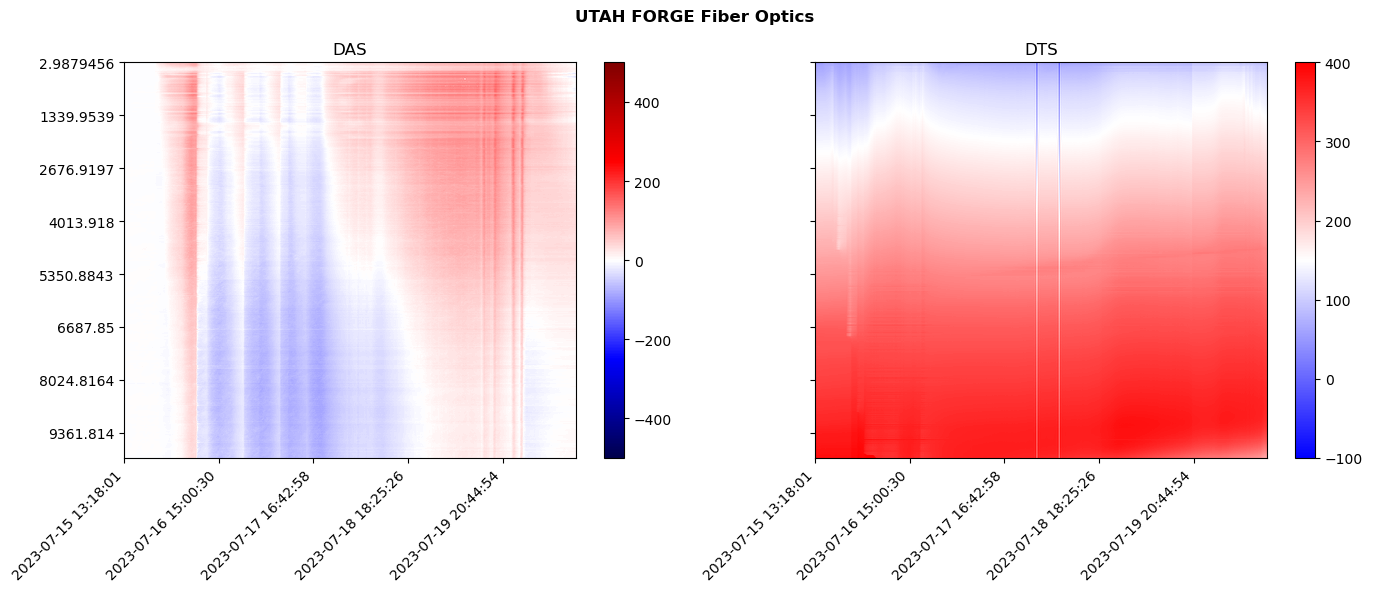

In [264]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
ax1, ax2 = axs

dt, dz = 360, 401

im1 = ax1.imshow(das_arr.T, cmap='seismic', aspect='auto', interpolation='lanczos', vmin=-500, vmax=500)
ax1.set_xticks(np.arange(0, len(das_timestamps), dt)); ax1.set_xticklabels(das_timestamps[::dt], rotation=45, ha='right')
ax1.set_yticks(np.arange(0, len(das_depth_arr), dz)); ax1.set_yticklabels(das_depth_arr[::dz])
ax1.set(title='DAS')
cb1 = fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(dts_arr.T, cmap='bwr', aspect='auto', interpolation='lanczos', vmin=-100, vmax=400)
ax2.set_xticks(np.arange(0, len(dts_timestamps), dt)); ax2.set_xticklabels(dts_timestamps[::dt], rotation=45, ha='right')
ax2.set_yticks(np.arange(0, len(dts_depth_arr), dz)); ax2.set_yticklabels(dts_depth_arr[::dz])
ax2.set(title='DTS')
cb2 = fig.colorbar(im2, ax=ax2)

plt.suptitle('UTAH FORGE Fiber Optics', weight='bold')
plt.tight_layout()
plt.show()

***
# END